# 匯入資料：Google 評論
<b>以新竹遠東巨城購物中心（Big City）為例（共 9147 筆文字評論與星等）</b>
- 評論內容
- 星等（1~5 顆星）

<b>unigram + one-hot encoding + CNN</b>

### 屬於分類還是迴歸問題？
ordinal regression：預測值屬於順序量尺（Ordinal Scale），介於分類與迴歸之間。

In [1]:
import pandas as pd
df = pd.read_pickle('BigCity_GoogleComments')
df

,評論,星等
0,很大很好逛，非常適合消磨假日時光；可惜遠百跟sogo雖然連在一起，卻沒有資訊共通，像是我如果...,4
1,B1停車場一出來就有日式精品店和服飾店，很好逛。\n只是假日停車位實在不好找，需要繞很多圈。,5
2,跟新竹sogo 互通，變成超大的百貨公司，走到迷路ㄟ。,4
3,"好好逛的百貨公司。不只好逛,遠傳5G超級快。快來體驗。玩手遊無敵爽！",5
4,回不去的4G，遠傳5G快又穩，今日至巨城用餐，在等待候位時，與朋友一起連線，進入遊戲就是快，...,5
...,...,...
9142,(由 Google 提供翻譯) 好方便\n\n(原始評論)\n好方便,4
9143,(由 Google 提供翻譯) 很好逛，美食也多\n\n(原始評論)\n很好逛，美食也多,5
9144,(由 Google 提供翻譯) ㄒ\n\n(原始評論)\nㄒ,4
9145,(由 Google 提供翻譯) 歐克\n\n(原始評論)\nOokk,1


# 資料預處理

<b>星等轉為數值型態</b>

In [2]:
df['星等'] = df['星等'].astype('int')

<b>各星等數量分佈</b>

In [3]:
df.groupby('星等').count()

,評論
星等,
1,163
2,133
3,838
4,3096
5,4917


<b>處理評論內的：(由 Google 提供翻譯)、(原始評論)、\n</b>

範例1：（英文）<br>
(由 Google 提供翻譯) 到目前為止，您唯一可以在新竹與商場，雜貨店，時尚，電影院和所有商店相匹配的地方。你需要知道大多數人會在周末去那裡，所以它會很擁擠。\n\n(原始評論)\nSo far the only place where you can match malls, grocery stores, fashion, cinema, and all in hsinchu. You need to be aware most of the people will go there during weekends so it will be crowded.

範例2：（中文）<br>
(由 Google 提供翻譯) 逛街很方便\n\n(原始評論)\n逛街很方便

範例3：（日文）<br>
(由 Google 提供翻譯) 新竹最大的旅遊景點！\n\n(原始評論)\n新竹で最大の観光名所！

In [4]:
for i in range(len(df)):
    # 刪除原始評論部分文字
    df.loc[i, '評論'] = df.loc[i, '評論'].split('(原始評論)')[0]
    # 將(由 Google 提供翻譯)、\n 取代成空白
    df.loc[i, '評論'] = df.loc[i, '評論'].replace('(由 Google 提供翻譯)', ' ')
    df.loc[i, '評論'] = df.loc[i, '評論'].replace('\n', ' ')

最大顯示 rows 設定

In [5]:
pd.set_option('display.max_rows', 10000)

In [6]:
df

,評論,星等
0,很大很好逛，非常適合消磨假日時光；可惜遠百跟sogo雖然連在一起，卻沒有資訊共通，像是我如果...,4
1,B1停車場一出來就有日式精品店和服飾店，很好逛。 只是假日停車位實在不好找，需要繞很多圈。,5
2,跟新竹sogo 互通，變成超大的百貨公司，走到迷路ㄟ。,4
3,"好好逛的百貨公司。不只好逛,遠傳5G超級快。快來體驗。玩手遊無敵爽！",5
4,回不去的4G，遠傳5G快又穩，今日至巨城用餐，在等待候位時，與朋友一起連線，進入遊戲就是快，...,5
5,目前新竹的人流中心，選擇多，但是建議避開週五晚上或假日，人很多、網路很慢。,4
6,星巴克人潮如菜市場，有人帶寵物，感覺不到有水準的服務，雖然咖啡品質標準沒有變。,1
7,夏天就要廢在巨城。配著冷氣。加上遠傳5G速度。真的好爽❤️,5
8,人超多，無法保持安全社交距離，但戴口罩的不多，希望能加強入內消費者防疫戴口罩的觀念,5
9,原本想說剛開台5g會不會不太穩，沒想到在巨城意外的快，遠傳果然沒讓我失望👍,5


# 分詞（tokenization）

In [7]:
import jieba
jieba.load_userdict("dict.txt.big.tw")

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/fm/3k9k8cq55zn_bw88_6fybf300000gn/T/jieba.cache
Loading model cost 0.512 seconds.
Prefix dict has been built successfully.


因為評論長度偏短，所以在這就先暫不刪除 stopwords，因為其中可能包含帶有情感的單詞，如：嘆詞等 <br>
e.g. 僅僅、寧可、但是、而已、唉...

In [8]:
punctuation = set()
with open ('punctuation_zh_tw.txt', 'r') as f:
    for line in f.readlines():
        punctuation.add(line.strip())
with open ('punctuation_en.txt', 'r') as f:
    for line in f.readlines():
        punctuation.add(line.strip())
punctuation.add(' ')
punctuation.add('　') #全形空白

In [9]:
bow = set()
comment_bow = dict()
for i in range(len(df)):
    words = [word for word in jieba.cut(df.loc[i,'評論']) if word not in punctuation]
    comment_bow.update({i:set(words)})
    bow = bow.union(set(words))

In [10]:
len(bow)

8302

# 製作 one-hot encoding 特徵
註：也可使用 Pandas DataFrame 製作特徵，但速度較使用 numpy ndarray 慢許多。

In [11]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

bow_array = np.array(list(bow)).reshape(-1, 1)
onehot = OneHotEncoder().fit(bow_array)

X = np.ndarray((len(df),len(bow)))
for i in range(len(df)):
    # 少數僅含空白、標點符號之類而被刪除完內容的評論
    if(len(comment_bow[i])==0):
        X[i] = np.zeros((len(bow)))
    else:
        comment_array = np.array(list(comment_bow[i])).reshape(-1, 1)
        comment_onehot = onehot.transform(comment_array).toarray().sum(axis=0)
        X[i] = comment_onehot

In [12]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
X.shape

(9147, 8302)

# 切分資料

In [14]:
y = df['星等']

keras 預設 label 從 0 開始

In [15]:
for i in range(len(df)):
    df.loc[i, '星等'] = df.loc[i, '星等'] - 1

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [17]:
X_train.shape

(6860, 8302)

In [19]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=5)
y_test = to_categorical(y_test, num_classes=5)

In [20]:
y_train.shape

(6860, 5)

# 建立 CNN 模型
可自行調整模型架構與超參數

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Conv1D, GlobalMaxPooling1D, MaxPooling1D

Conv1D(filters, kernel_size)
- filters: 過濾器數量
- kernel_size: windows 大小

GlobalMaxPooling1D()：全域最大池化層
- 對軸 1 求全部數值的最大值：(None, None, 32) -> (None, 32)

MaxPooling1D()：最大池化層
- 需設定 pool_size：(None, None, 32) -> (None, None, 32)

In [22]:
model = Sequential()
model.add(Embedding(X_train.shape[1], 256))
model.add(Conv1D(32, 7))
#model.add(MaxPooling1D(5))
#model.add(Conv1D(32, 7))
model.add(GlobalMaxPooling1D())
model.add(Dense(5, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 256)         2125312   
_________________________________________________________________
conv1d (Conv1D)              (None, None, 32)          57376     
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 5)                 165       
Total params: 2,182,853
Trainable params: 2,182,853
Non-trainable params: 0
_________________________________________________________________


In [23]:
history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test), verbose=1)

Epoch 1/5
54/54 [==============================] - 184s 3s/step - loss: 1.1016 - accuracy: 0.5064 - val_loss: 1.0430 - val_accuracy: 0.5523
Epoch 2/5
54/54 [==============================] - 188s 3s/step - loss: 1.0588 - accuracy: 0.5327 - val_loss: 1.0454 - val_accuracy: 0.5523
Epoch 3/5
54/54 [==============================] - 212s 4s/step - loss: 1.0594 - accuracy: 0.5318 - val_loss: 1.0387 - val_accuracy: 0.5523
Epoch 4/5
54/54 [==============================] - 207s 4s/step - loss: 1.0573 - accuracy: 0.5327 - val_loss: 1.0498 - val_accuracy: 0.5523
Epoch 5/5
54/54 [==============================] - 195s 4s/step - loss: 1.0573 - accuracy: 0.5325 - val_loss: 1.0416 - val_accuracy: 0.5518


# 模型評估

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_train_history(history, train_metrics, val_metrics):
    plt.plot(history.history.get(train_metrics),'-o')
    plt.plot(history.history.get(val_metrics),'-o')
    plt.ylabel(train_metrics)
    plt.xlabel('Epochs')
    plt.legend(['training', 'validation'])

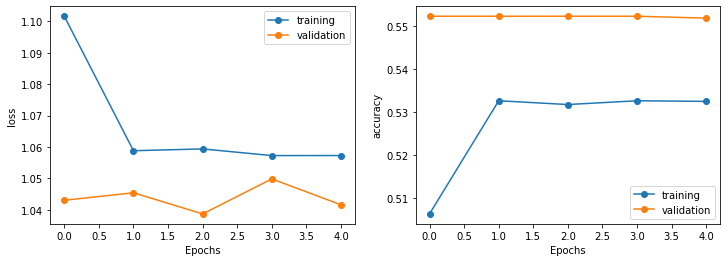

In [25]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plot_train_history(history, 'loss','val_loss')
plt.subplot(1,2,2)
plot_train_history(history, 'accuracy','val_accuracy')